## Leonardo Sanchez Roncancio

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import time
import torch.optim as optim


#pip install torch torchvision torchaudio

In [2]:
df = pd.read_excel("Data_Ejercicio_Lab3_winequality-white.xlsx")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


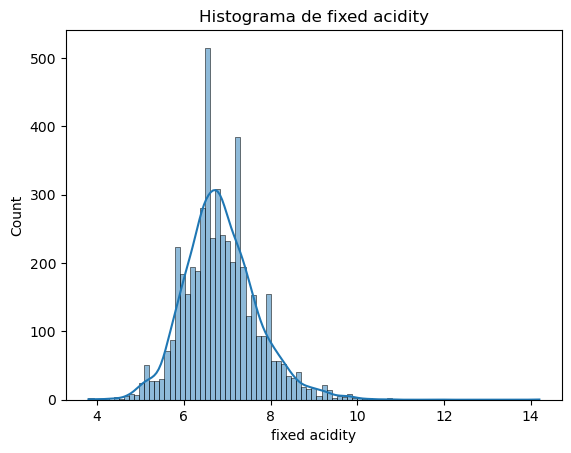

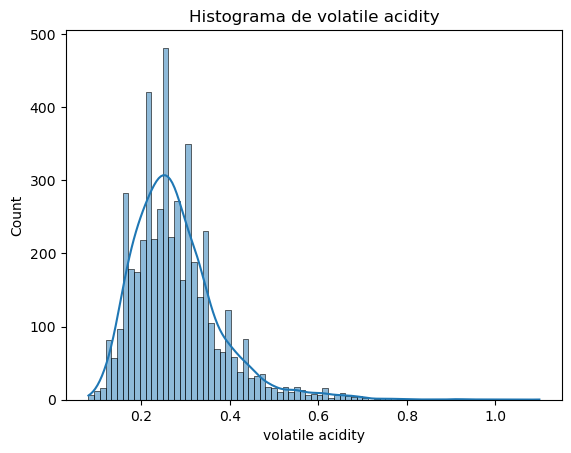

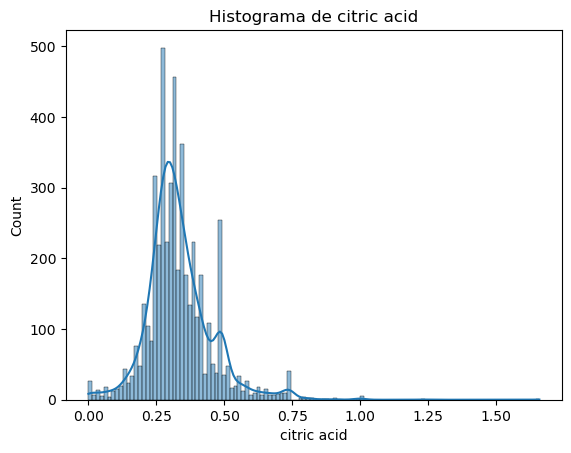

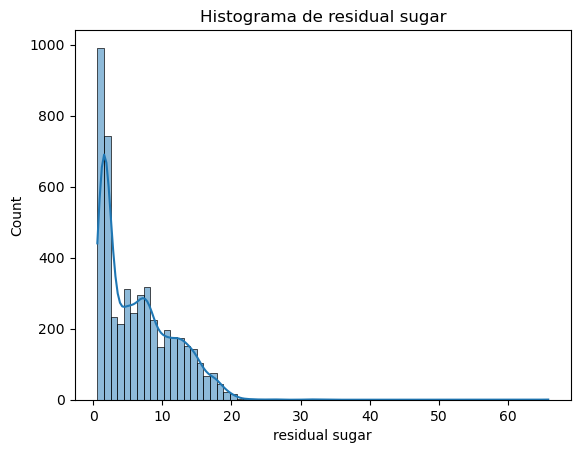

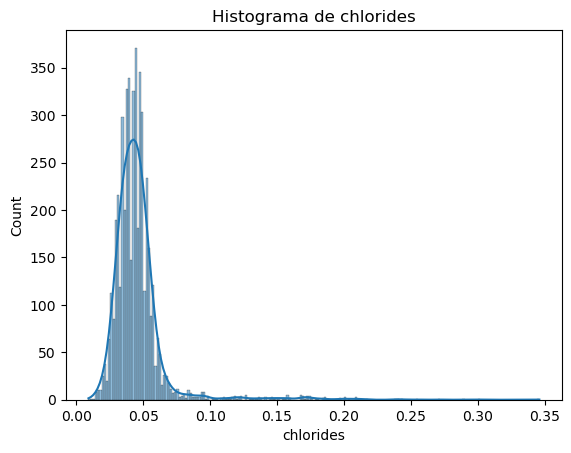

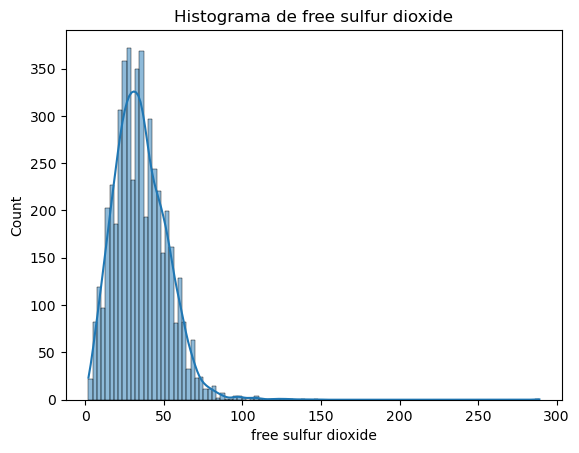

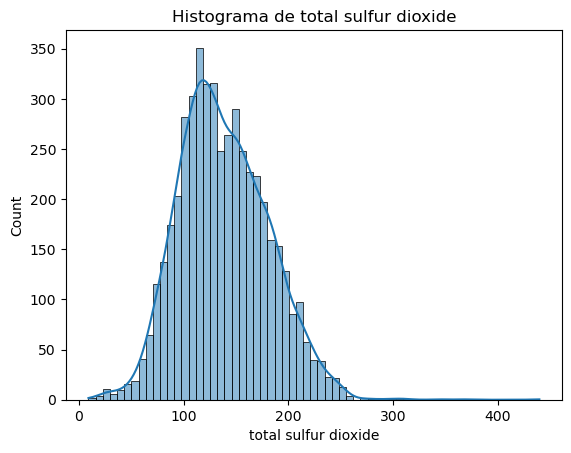

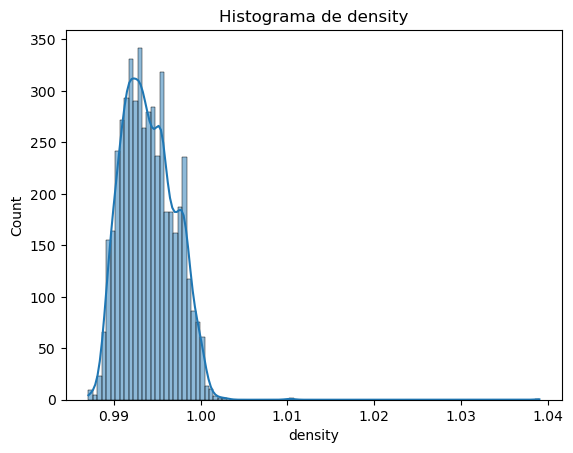

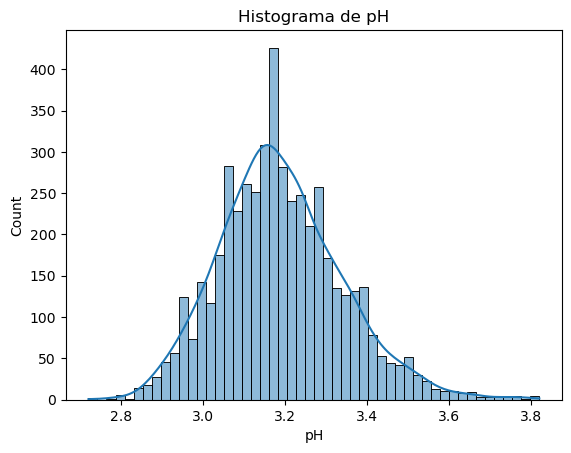

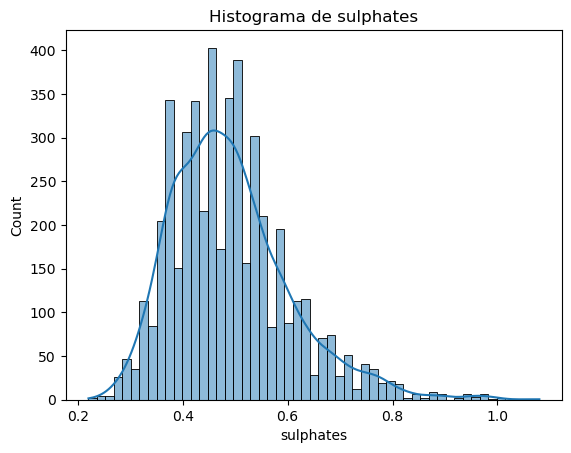

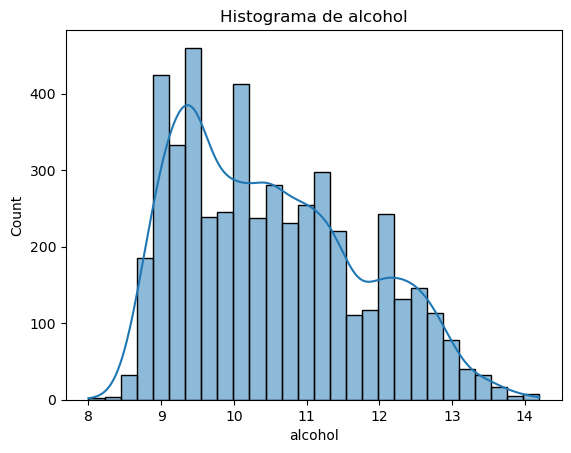

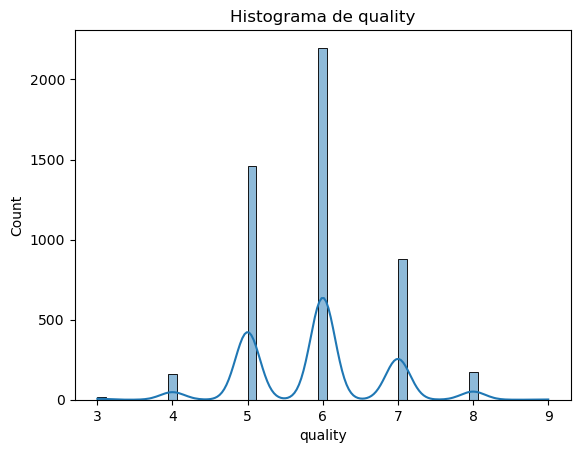

In [258]:
# Itera sobre las columnas del DataFrame y traza un histograma para cada una
for col in df.columns:
    plt.figure()  # Crea una nueva figura para cada histograma
    sns.histplot(df[col], kde=True)  # Trama el histograma utilizando Seaborn
    plt.title(f'Histograma de {col}')  # Agrega el título de la columna al histograma

# Muestra los histogramas
plt.show()


In [484]:
class DividirDataSet:
    def dividirXY(self, df):
        x = df.drop("quality", axis=1)
        y = df["quality"].copy()
        print(f"x shape {x.shape}, y shape {y.shape}")
        return x, y 
    
    def escalar(self, x):
        sc = StandardScaler()
        x = sc.fit_transform(x)
        return x
    
    def dividir_test_train(self,x,y,test_size=0.15):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle=True)
        print('x_train:', x_train.shape)
        print('y_train:', y_train.shape)
        print('x_test:', x_test.shape)
        print('y_test:', y_test.shape)
        return x_train, x_test, y_train, y_test
        
    def dividir_train_val(self, x_train, y_train, test_size=0.20):
        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=test_size, shuffle=True)
        print('x_train:', x_train.shape)
        print('y_train:', y_train.shape)
        print('x_val:', x_val.shape)
        print('y_val:', y_val.shape)
        return x_train, x_val, y_train, y_val

In [485]:
div = DividirDataSet()
x,y = div.dividirXY(df)
x =div.escalar(x)
x_train, x_test, y_train, y_test = div.dividir_test_train(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = div.dividir_train_val(x, y, test_size=0.20)

x shape (4898, 11), y shape (4898,)
x_train: (4163, 11)
y_train: (4163,)
x_test: (735, 11)
y_test: (735,)
x_train: (3918, 11)
y_train: (3918,)
x_val: (980, 11)
y_val: (980,)


In [486]:
# Dataset and DataLoader: define the function for the dataset
class WineDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(np.array(y).astype(np.float32), dtype=torch.float32)
    def __len__(self):
         # Especifiar el número total de ejemplos
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        # Devolver un ejemplo del dataset con la indice 'idx'
        return self.x[idx], self.y[idx]

In [487]:
# Definimos los datasets para el entrenamiento, validación y prueba
train_dataset = WineDataset(x_train, y_train)
val_dataset = WineDataset(x_val, y_val)
test_dataset = WineDataset(x_test, y_test)

In [488]:
batch_size = 15

# Definimos los dataloaders para el entrenamiento, validación y prueba
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

In [489]:
# Vemos un batch de datos (un consiste en 64 ejemplos de datos)
for i_batch, (x_train, y_train) in enumerate(train_dataloader):
    print("número de batch :", i_batch)
    print("x_train en i_batch : ", x_train.size())
    print("y_train en i_batch :", y_train.size())
    break

número de batch : 0
x_train en i_batch :  torch.Size([15, 11])
y_train en i_batch : torch.Size([15])


In [490]:
class WineQualityModel(nn.Module):

    def __init__(self, input_shape):
        super(WineQualityModel, self).__init__()
        self.fc1 = nn.Linear(input_shape, 8)
        self.fc2 = nn.Linear(8, 16)
        self.fc3 = nn.Linear(16, 32)
        self.fc4 = nn.Linear(32, 1)   

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # Aplicar función de activación ReLU
        x = torch.relu(self.fc2(x))   # Aplicar función de activación ReLU
        x = torch.tanh(self.fc3(x))   # Aplicar función de activación tanh
        x = self.fc4(x)           # Sin función de activación en la salida para regresión
        return x

In [491]:
model = WineQualityModel(input_shape=x.shape[1])

In [492]:
learning_rate = 0.0005
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_fn = nn.MSELoss()

In [493]:
def train(model, train_dataloader, optimizer, loss_fn):
    
    # Pon modelo en modo para entrenar
    model.train()

    # Especificar variables para las metricas
    epoch_loss = 0

    for i_batch, (x_train, y_train) in enumerate(train_dataloader):

        # Pon a cero los gradientes para cada batch 
        # No mezclar información de los gradientes del batch anterior con este batch
        optimizer.zero_grad()

        # Calcular la salida del modelo
        predicciones = model(x_train)

        # Calcular las perdidas y el coste
        batch_loss = loss_fn(predicciones, y_train.reshape(-1,1))

        # Calcular los gradientes 
        batch_loss.backward()
        
        #Ajustar los parametros (pesos y sesgos)
        optimizer.step()

        # Calcular cuantos han sido predicho correctamente
        correct_batch = (y_train.reshape(-1,1) == predicciones.round()).sum()

        # Guardar las metricas
        epoch_loss += batch_loss.item()
        
    # Calcular la metrica para la época entera
    loss_train = epoch_loss / i_batch    
    return loss_train

In [494]:
def evaluation(model, val_dataloader, loss_fn):
    # Pon modelo en modo para evaluar
    model.eval()

    # Especificar variables para las metricas
    epoch_loss = 0

    # No queremos calcular los gradientes
    with torch.no_grad(): 

         for i_batch, (x_val, y_val) in enumerate(val_dataloader):

            # Calcular la salida del modelo
            predicciones = model(x_val)

            # Calcular las perdidas y el coste
            batch_loss = loss_fn(predicciones, y_val.reshape(-1,1))

            # Guardar las metricas
            epoch_loss += batch_loss.item()

    # Calcular la metrica para la época entera
    loss_val = epoch_loss / i_batch

    return loss_val

In [495]:
def training_evaluation_loop(epochs, model, train_dataloader, val_dataloader, optimizer, loss_fn):
    # Iniciar temporizador para realize un seguimiento del tiempo de entrenamiento
    start = time.time()
    # Crear listas para las metricas
    loss_values_train = []
    loss_values_val = []

    for epoch in range(epochs):

        # Ejecutar función de entrenamiento y guardar las metricas
        loss_train = train(model, train_dataloader, optimizer, loss_fn)
        loss_values_train.append(loss_train)

        # Ejecutar función de validación y guardar las metricas
        loss_val = evaluation(model, val_dataloader, loss_fn)
        loss_values_val.append(loss_val)
        
         # Imprimir cada 10 epocas
        if epoch % 10 == 0:
            print(f'Epoch: {epoch:4.0f} | Train Loss: {loss_train:.5f} | Validation Loss: {loss_val:.5f}')
            
    end = time.time()
    total_time = end - start
   
    print(f'Tiempo total de entrenar: {total_time}')

    return loss_values_train, loss_values_val

In [496]:
torch.manual_seed(0)
epochs = 200
loss_values_train,loss_values_val= training_evaluation_loop(epochs, model, train_dataloader, val_dataloader, optimizer, loss_fn)

Epoch:    0 | Train Loss: 19.10950 | Validation Loss: 1.49710
Epoch:   10 | Train Loss: 0.58056 | Validation Loss: 0.59812
Epoch:   20 | Train Loss: 0.53233 | Validation Loss: 0.53880
Epoch:   30 | Train Loss: 0.50917 | Validation Loss: 0.51815
Epoch:   40 | Train Loss: 0.49856 | Validation Loss: 0.50761
Epoch:   50 | Train Loss: 0.49442 | Validation Loss: 0.50114
Epoch:   60 | Train Loss: 0.48697 | Validation Loss: 0.50065
Epoch:   70 | Train Loss: 0.48177 | Validation Loss: 0.48955
Epoch:   80 | Train Loss: 0.48088 | Validation Loss: 0.49579
Epoch:   90 | Train Loss: 0.47485 | Validation Loss: 0.48692
Epoch:  100 | Train Loss: 0.47396 | Validation Loss: 0.48900
Epoch:  110 | Train Loss: 0.47011 | Validation Loss: 0.48985
Epoch:  120 | Train Loss: 0.46847 | Validation Loss: 0.48095
Epoch:  130 | Train Loss: 0.46714 | Validation Loss: 0.48396
Epoch:  140 | Train Loss: 0.46660 | Validation Loss: 0.48288
Epoch:  150 | Train Loss: 0.46263 | Validation Loss: 0.48759
Epoch:  160 | Train Los

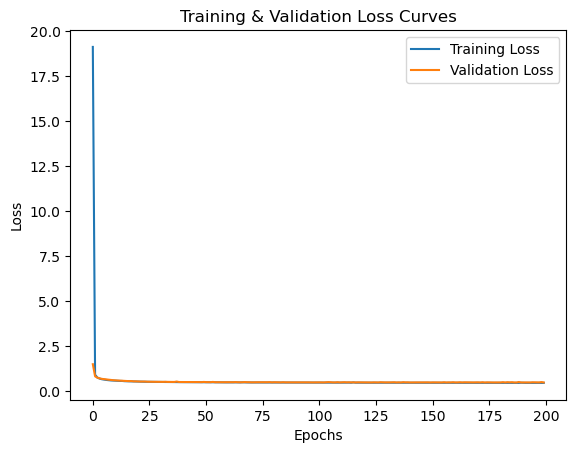

In [497]:
plt.plot(list(range(epochs)), loss_values_train, label='Training Loss')
plt.plot(list(range(epochs)), loss_values_val, label='Validation Loss')
plt.title('Training & Validation Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [498]:
# Realizamos predicciones con el modelo entrenado
def predictions(model, test_dataloader):
    predictions = []
    true_labels = []

    correct_test = 0
    elements = 0
    model.eval()
    with torch.no_grad():
        for x_test, y_test in test_dataloader:
            outputs = model(x_test)
            predictions.append(outputs.round().detach().cpu().numpy())
            true_labels.append(y_test.detach().cpu().numpy())
            correct_batch = (y_test.reshape(-1,1) == outputs.round()).sum()
            correct_test += correct_batch.detach().cpu().numpy()
            elements += len(y_test) 

    predictions = np.vstack(predictions)
    true_labels = np.hstack(true_labels)
    print(f'El conjunto de prueba tiene un precisión de: {correct_test/elements*100}%') # test_loader

    return predictions, true_labels

In [499]:
predictions, true_labels = predictions(model, test_dataloader)

El conjunto de prueba tiene un precisión de: 57.41496598639456%


In [500]:
print(predictions[5], true_labels[5])

[5.] 5.0
